# **Convolutional Neural Network**

## **Import Libraries**

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, Flatten, concatenate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

## **Read Dataset**

In [2]:
# Load the dataset that has been preprocessed
data = pd.read_csv('dataset/preprocessed_breast-cancer.csv')

# Extract features (X) and target (y) from the dataset
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Apply Scaling**

In [3]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## **Model Building**

In [5]:
# Define input layer
input_layer = Input(shape=(X.shape[1], 1))

# Parallel convolutional layers with different kernel sizes
conv1 = Conv1D(64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_layer)
conv2 = Conv1D(64, kernel_size=5, activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_layer)
conv3 = Conv1D(64, kernel_size=7, activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_layer)

# Merge feature maps
merged = concatenate([conv1, conv2, conv3])

# Flatten and add dense layers
x = Flatten()(merged)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)  # Additional Dropout

# Output layer
output_layer = Dense(1, activation='sigmoid')(x)

# Build the model
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 30, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 30, 64)    │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 30, 64)    │        384 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 30, 64)    │        512 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 30, 192)   │          0 │ conv1d[0][0],     │
│ (Concatenate)       │                   │            │ conv1d_1[0][0],   │
│                     │                   │            │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 5760)      │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    737,408 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 746,881 (2.85 MB)

 Trainable params: 746,881 (2.85 MB)

 Non-trainable params: 0 (0.00 B)

## **Model Training**

In [7]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=30, batch_size=32, verbose=1)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 276ms/step - accuracy: 0.6319 - loss: 0.9620 - val_accuracy: 0.8352 - val_loss: 0.6726
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.8308 - loss: 0.6411 - val_accuracy: 0.8462 - val_loss: 0.4695
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8741 - loss: 0.4860 - val_accuracy: 0.9231 - val_loss: 0.3357
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9221 - loss: 0.3788 - val_accuracy: 0.9451 - val_loss: 0.2799
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9351 - loss: 0.3244 - val_accuracy: 0.9670 - val_loss: 0.2529
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9430 - loss: 0.2943 - val_accuracy: 0.9341 - val_loss: 0.2705
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9567 - loss: 0.2837 - val_accuracy: 0.9451 - val_loss: 0.2556
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9448 - loss: 0.2825 - val_accuracy: 0.9670 

## **Model Evaluation**

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}\n")

y_pred_probs = model.predict(X_test).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.9759 - loss: 0.1560

Test Loss: 0.14545926451683044
Test Accuracy: 0.9736841917037964

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 613ms/step


In [9]:
average_precision = precision_score(y_test, y_pred, average='macro')
average_recall = recall_score(y_test, y_pred, average='macro')
average_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-Score: {average_f1:.4f}")

Average Precision: 0.9742
Average Recall: 0.9697
Average F1-Score: 0.9719


In [10]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## **Visualisation**

### **Confusion Matrix**

<Figure size 800x600 with 0 Axes>

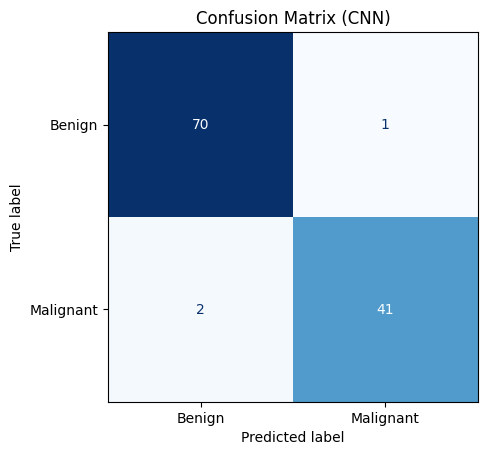

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])

plt.figure(figsize=(8, 6))

disp.plot(cmap=plt.cm.Blues, values_format="d", colorbar=False)
plt.title("Confusion Matrix (CNN)")

plt.show()

### **Accuracy of Training and Validation**

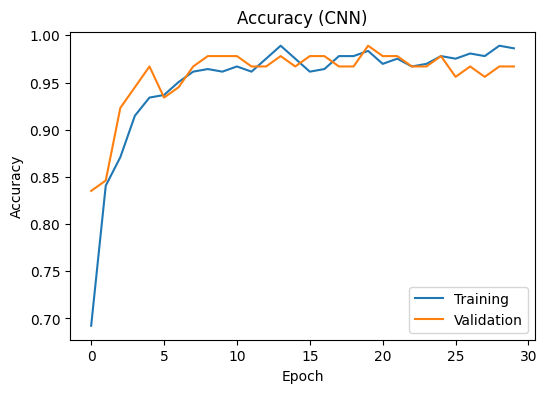

In [12]:
plt.figure(figsize=(6, 4))

plt.title('Accuracy (CNN)')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

### **Loss of Training and Validation**

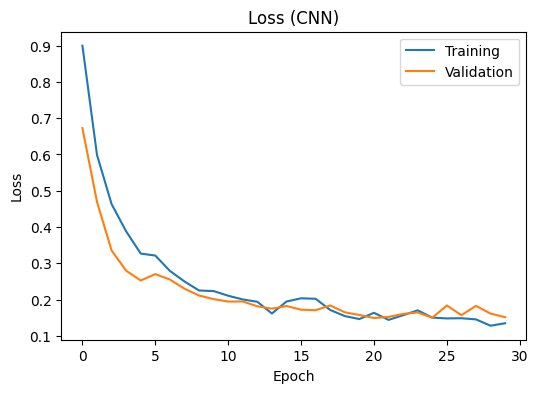

In [13]:
plt.figure(figsize=(6, 4))

plt.title('Loss (CNN)')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

### **Distribution of Predicted Probabilities**

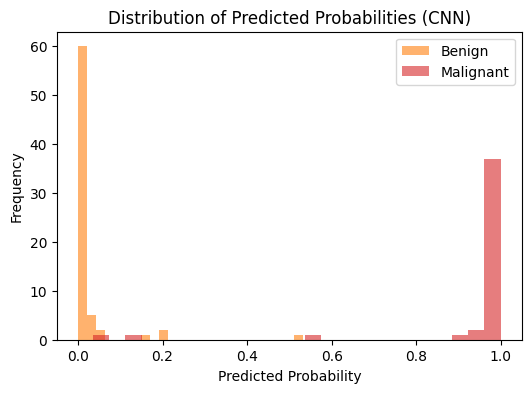

In [14]:
plt.figure(figsize=(6, 4))

plt.title('Distribution of Predicted Probabilities (CNN)')
plt.hist(y_pred_probs[y_test.ravel() == 0], bins=25, alpha=0.6, color='tab:orange', label='Benign')
plt.hist(y_pred_probs[y_test.ravel() == 1], bins=25, alpha=0.6, color='tab:red', label='Malignant')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.legend()
plt.show()

### **Receiver Operating Characteristic (ROC) Curve**

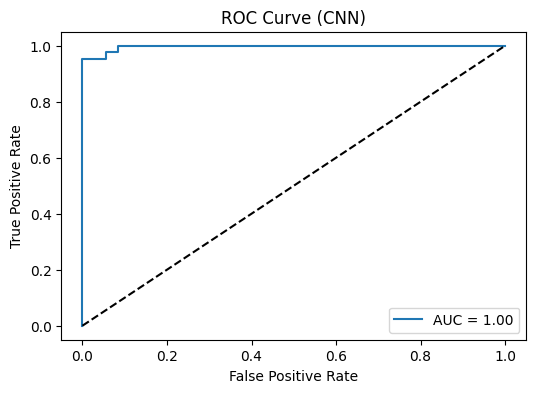

In [15]:
roc_auc = roc_auc_score(y_test, y_pred_probs)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)

plt.figure(figsize=(6, 4))

plt.title('ROC Curve (CNN)')
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()